## the main goal of this analys is that determine of Lunc- ust incident and affect to market overall.

According to the DO Kwon and team attack started at 2022-05-07 14:59 (UTC)  refer:https://agora.terra.money/t/terra-ecosystem-revival-plan-2-amended/18498
--Since Luna price goes 0.00001 at 05-12, we will use the data between 05-05 05-12 to show the changes. 
--We use USDT as stablecoin to compare the price
--LUNC/USDT UST/USDT BTC/USDT


### import necassary things

In [2]:
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
import datetime
pd.set_option('display.float_format', lambda x: '%.9f' % x)
import warnings
warnings.filterwarnings("ignore")

### get time,price,marketcap,volume for luna classic

In [97]:

api_url = "https://api.coingecko.com/api/v3/coins/terra-luna/market_chart?vs_currency=USD&days=65&interval=daily"
JSONContent = requests.get(api_url).json()

luna_price = pd.DataFrame.from_dict(JSONContent['prices'])
luna_price.columns=['Unix', 'Price']

luna_cap = pd.DataFrame.from_dict(JSONContent['market_caps'])
luna_cap.columns=['Unix', 'Market Cap']

luna_volume = pd.DataFrame.from_dict(JSONContent['total_volumes'])
luna_volume.columns=['Unix', 'Volume']

##combine all the dataframes into one
df_luna_orj = luna_price.merge(luna_cap,how='inner',on='Unix').merge(luna_volume,how='inner',on='Unix')


### changes in columns and values

In [98]:
#change the Time column from 'unix ms' to date
df_luna_orj['Date'] = pd.to_datetime(df_luna_orj['Unix'],unit='ms').dt.strftime('%Y-%m-%d')
#drop the Unix
df_luna_orj.drop('Unix',axis=1,inplace=True)
#order the columns so can look cool
df_luna_orj= df_luna_orj[['Date','Price','Market Cap','Volume']]

In [99]:
#change columns to int
df_luna_orj['Market Cap']=df_luna_orj['Market Cap'].round().astype(np.int64)
df_luna_orj['Volume']=df_luna_orj['Volume'].round().astype(np.int64)
df_luna_orj=df_luna_orj[(df_luna_orj['Date']<='2022-05-12') & (df_luna_orj['Date']>='2022-05-05')]
df_luna_orj.head(30)

,Date,Price,Market Cap,Volume
2,2022-05-05,86.136037083,29635965555,1888644394
3,2022-05-06,82.619726996,28341147677,2146296893
4,2022-05-07,77.564775499,26565180437,2212240363
5,2022-05-08,68.577322038,23535728154,2926696392
6,2022-05-09,63.856416469,21892228418,5213839316
7,2022-05-10,33.143682144,11693885984,6489564173
8,2022-05-11,16.866653490,6530663270,11400022297
9,2022-05-12,1.062878110,1636528517,16547891266


### save as csv and read from csv

In [101]:
#to csv and read csv
luna_csv = df_luna_orj.to_csv("luna_csv.csv",sep=",",encoding='utf-8',index=False)
df_luna_csv=pd.read_csv("luna_csv.csv")
df_luna= df_luna_csv.copy()

### get time,price,marketcap,volume for ust classic

In [102]:
##get time,price,marketcap,volume for ust classic
api_url = "https://api.coingecko.com/api/v3/coins/terrausd/market_chart?vs_currency=USD&days=68&interval=daily"
JSONContent = requests.get(api_url).json()

ust_price = pd.DataFrame.from_dict(JSONContent['prices'])
ust_price.columns=['Unix', 'Price']

ust_cap = pd.DataFrame.from_dict(JSONContent['market_caps'])
ust_cap.columns=['Unix', 'Market Cap']

ust_volume = pd.DataFrame.from_dict(JSONContent['total_volumes'])
ust_volume.columns=['Unix', 'Volume']

##combine all the dataframes into one
df_ust_orj = ust_price.merge(ust_cap,how='inner',on='Unix').merge(ust_volume,how='inner',on='Unix')


### changes in columns and values

In [103]:
#change the Time column from 'unix ms' to date
df_ust_orj['Date'] = pd.to_datetime(df_ust_orj['Unix'],unit='ms').dt.strftime('%Y-%m-%d')
#drop the Unix
df_ust_orj.drop('Unix',axis=1,inplace=True)
#order the columns so can look cool
df_ust_orj= df_ust_orj[['Date','Price','Market Cap','Volume']]

In [104]:
#change columns to int
df_ust_orj['Market Cap']=df_ust_orj['Market Cap'].round().astype(np.int64)
df_ust_orj['Volume']=df_ust_orj['Volume'].round().astype(np.int64)
df_ust_orj=df_ust_orj[(df_ust_orj['Date']<='2022-05-12')&(df_ust_orj['Date']>='2022-05-05')]
df_ust_orj.head(2)

,Date,Price,Market Cap,Volume
5,2022-05-05,1.001242587,18700360530,817899887
6,2022-05-06,1.000841241,18674018450,996431870


### to csv and read csv

In [105]:
ust_csv = df_ust_orj.to_csv("ust_csv.csv",sep=",",encoding='utf-8',index=False)
df_ust_csv=pd.read_csv("ust_csv.csv")
df_ust= df_ust_csv.copy()

## get time,price,marketcap,volume for btc

In [106]:

api_url = "https://api.coingecko.com/api/v3/coins/bitcoin/market_chart?vs_currency=USD&days=68&interval=daily"
JSONContent = requests.get(api_url).json()

btc_price = pd.DataFrame.from_dict(JSONContent['prices'])
btc_price.columns=['Unix', 'Price']

btc_cap = pd.DataFrame.from_dict(JSONContent['market_caps'])
btc_cap.columns=['Unix', 'Market Cap']

btc_volume = pd.DataFrame.from_dict(JSONContent['total_volumes'])
btc_volume.columns=['Unix', 'Volume']

##combine all the dataframes into one
df_btc_orj = btc_price.merge(btc_cap,how='inner',on='Unix').merge(btc_volume,how='inner',on='Unix')


In [107]:
#change the Time column from 'unix ms' to date
df_btc_orj['Date'] = pd.to_datetime(df_btc_orj['Unix'],unit='ms').dt.strftime('%Y-%m-%d')
#drop the Unix
df_btc_orj.drop('Unix',axis=1,inplace=True)
#order the columns so can look cool
df_btc_orj= df_btc_orj[['Date','Price','Market Cap','Volume']]

In [108]:
#change columns to int
df_btc_orj['Market Cap']=df_btc_orj['Market Cap'].round().astype(np.int64)
df_btc_orj['Volume']=df_btc_orj['Volume'].round().astype(np.int64)
df_btc_orj=df_btc_orj[(df_btc_orj['Date']<='2022-05-12')& (df_btc_orj['Date']>='2022-05-05')]
df_btc_orj.head(2)

,Date,Price,Market Cap,Volume
5,2022-05-05,39699.024041254,755764276889,31748901527
6,2022-05-06,36612.229548803,696020943882,37402043366


In [109]:
#to csv and read csv
btc_csv = df_btc_orj.to_csv("btc_csv.csv",sep=",",encoding='utf-8',index=False)
df_btc_csv=pd.read_csv("btc_csv.csv")
df_btc= df_btc_csv.copy()

### check is there any null value

In [110]:
#lets check our
a = df_btc.isnull().sum()
b = df_ust.isnull().sum()
c = df_luna.isnull().sum()

print(a)
print(b)
print(c)

Date          0
Price         0
Market Cap    0
Volume        0
dtype: int64
Date          0
Price         0
Market Cap    0
Volume        0
dtype: int64
Date          0
Price         0
Market Cap    0
Volume        0
dtype: int64


## combine all data into one

In [111]:
all_data = df_luna.merge(df_ust,how='inner',on='Date').merge(df_btc,how='inner',on='Date')
all_data.rename(columns = {'Price_x':'Price_Luna', 'Market Cap_x':'Market Cap_Luna', 'Volume_x':'Volume_Luna','Price_y':'Price_UST','Market Cap_y':'Market Cap_UST', 'Volume_y':'Volume_UST','Price':'Price_BTC','Market Cap':'Market Cap_BTC', 'Volume':'Volume_BTC'}, inplace = True)
all_data.sample(4)

,Date,Price_Luna,Market Cap_Luna,Volume_Luna,Price_UST,Market Cap_UST,Volume_UST,Price_BTC,Market Cap_BTC,Volume_BTC
1,2022-05-06,82.619726996,28341147677,2146296893,1.000841241,18674018450,996431870,36612.229548803,696020943882,37402043366
7,2022-05-12,1.062878110,1636528517,16547891266,0.775288499,9910009034,1835510122,28913.488363654,549294001873,65985702702
0,2022-05-05,86.136037083,29635965555,1888644394,1.001242587,18700360530,817899887,39699.024041254,755764276889,31748901527
3,2022-05-08,68.577322038,23535728154,2926696392,0.994662419,18708520935,2004711722,35573.310198835,678702448511,19130720395


In [112]:
all_data.to_csv("all_data_csv.csv",sep=",",encoding='utf-8',index=False)
df_all_data_csv=pd.read_csv("all_data_csv.csv")
df_all_data= df_all_data_csv.copy()

In [113]:
df_all_data.describe()

,Price_Luna,Market Cap_Luna,Volume_Luna,Price_UST,Market Cap_UST,Volume_UST,Price_BTC,Market Cap_BTC,Volume_BTC
count,8.000000000,8.000000000,8.000000000,8.000000000,8.000000000,8.000000000,8.000000000,8.000000000,8.000000000
mean,53.728436479,18728916001.500000000,6103149386.750000000,0.918401081,16596688265.750000000,2188066369.000000000,34035.159933763,647778949794.625000000,41217815413.750000000
std,32.364839559,10665809751.134983063,5301447847.935166359,0.110657406,3296399724.809511662,1767246197.927199125,3681.610796407,70283143385.368606567,16274999644.522996902
min,1.062878110,1636528517.000000000,1888644394.000000000,0.775288499,9910009034.000000000,817899887.000000000,28913.488363654,549294001873.000000000,19130720395.000000000
25%,29.074424981,10403080305.500000000,2195754495.500000000,0.794331268,15184873485.750000000,958400620.500000000,30837.597140429,587032770182.250000000,31514320270.750000000
50%,66.216869254,22713978286.000000000,4070267854.000000000,0.994924078,18654651884.000000000,1673731455.500000000,34821.811198207,663608385076.500000000,34812665190.000000000
75%,78.828513373,27009172247.000000000,7717178704.000000000,1.000338565,18702400631.250000000,2381562120.750000000,36240.353108438,689325248714.250000000,55146004556.000000000
max,86.136037083,29635965555.000000000,16547891266.000000000,1.001242587,18770471902.000000000,5981604373.000000000,39699.024041254,755764276889.000000000,65985702702.000000000


## Analysis Part

### Luna and UST Price Movement in Incident

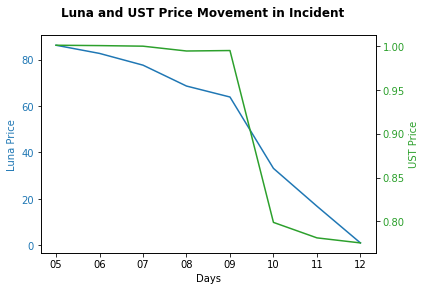

In [114]:
a= pd.to_datetime(df_btc['Date'], format='%Y-%m-%d').dt.strftime('%d').values.tolist()

fig,ax1=plt.subplots()
ax.plot()
color = 'tab:blue'
ax1.set_xlabel('Days')
ax1.set_ylabel('Luna Price', color = color)
ax1.plot(a,df_all_data['Price_Luna'], color = color)
ax1.tick_params(axis ='y', labelcolor = color)
   
ax2 = ax1.twinx()
color = 'tab:green'
ax2.set_ylabel('UST Price', color = color)
ax2.plot(a, df_all_data['Price_UST'], color = color)
ax2.tick_params(axis ='y', labelcolor = color)
  
fig.suptitle('Luna and UST Price Movement in Incident', fontweight ="bold")
plt.show()


plt.show()

###### We can see that after an attack luna and ust price dropped highly and ust de-pegged

## Drop rate on prices

Text(0.5, 0.98, 'Drop Rate on Price in Incident')

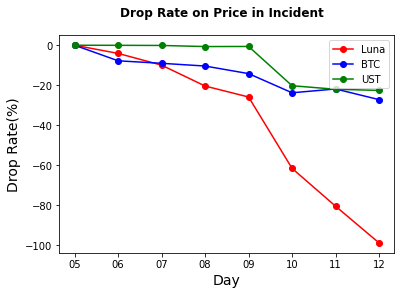

In [115]:
a= pd.to_datetime(df_btc['Date'], format='%Y-%m-%d').dt.strftime('%d').values.tolist()
# create figure and axis objects with subplots()

fig,ax = plt.subplots()
# make a plot
ax.plot(a,
        df_all_data['Price_Luna']/df_all_data['Price_Luna'].iloc[0]*100-100,
        color="red", 
        marker="o")
ax.plot(a,
        df_all_data['Price_BTC']/df_all_data['Price_BTC'].iloc[0]*100-100,
        color="blue", 
        marker="o")
ax.plot(a,
        df_all_data['Price_UST']/df_all_data['Price_UST'].iloc[0]*100-100,
        color="green", 
        marker="o")
# set x-axis label
ax.set_xlabel("Day", fontsize = 14)
# set y-axis label
ax.set_ylabel("Drop Rate(%)",
              color="black",
              fontsize=14)
ax.legend(['Luna','BTC','UST'])
fig.suptitle('Drop Rate on Price in Incident', fontweight ="bold")

###### it seems attack on ust and luna trigger the drop for btc

## Drop Rate on Market Cap

Text(0.5, 0.98, 'Drop Rate on Market Cap in Incident')

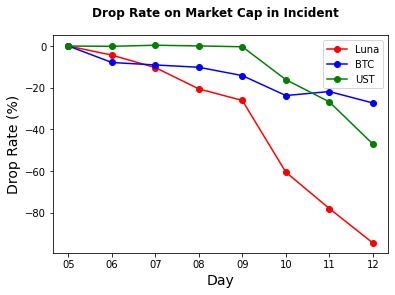

In [116]:
a= pd.to_datetime(df_btc['Date'], format='%Y-%m-%d').dt.strftime('%d').values.tolist()
# create figure and axis objects with subplots()
fig,ax = plt.subplots()
# make a plot
ax.plot(a,
        df_all_data['Market Cap_Luna']/df_all_data['Market Cap_Luna'].iloc[0]*100-100,
        color="red", 
        marker="o")
ax.plot(a,
        df_all_data['Market Cap_BTC']/df_all_data['Market Cap_BTC'].iloc[0]*100-100,
        color="blue", 
        marker="o")
ax.plot(a,
        df_all_data['Market Cap_UST']/df_all_data['Market Cap_UST'].iloc[0]*100-100,
        color="green", 
        marker="o")
# set x-axis label
ax.set_xlabel("Day", fontsize = 14)
# set y-axis label
ax.set_ylabel("Drop Rate (%)",
              color="black",
              fontsize=14)
ax.legend(['Luna','BTC','UST'])
fig.suptitle('Drop Rate on Market Cap in Incident', fontweight ="bold")

##### market cap drop for ust and luna seems cause the drop on btc also in first days, then market cap for btc stabilize

## Changes on Volume (%)

Text(0.5, 0.98, 'Drop Rate on Volume in Incident')

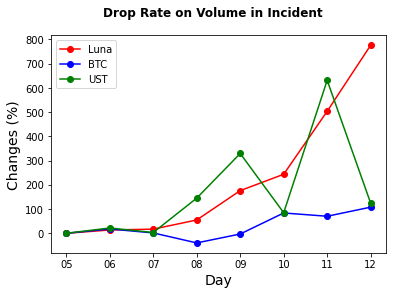

In [117]:
a= pd.to_datetime(df_btc['Date'], format='%Y-%m-%d').dt.strftime('%d').values.tolist()
# create figure and axis objects with subplots()
fig,ax = plt.subplots()
# make a plot
ax.plot(a,
        df_all_data['Volume_Luna']/df_all_data['Volume_Luna'].iloc[0]*100-100,
        color="red", 
        marker="o")
ax.plot(a,
        df_all_data['Volume_BTC']/df_all_data['Volume_BTC'].iloc[0]*100-100,
        color="blue", 
        marker="o")
ax.plot(a,
        df_all_data['Volume_UST']/df_all_data['Volume_UST'].iloc[0]*100-100,
        color="green", 
        marker="o")
# set x-axis label
ax.set_xlabel("Day", fontsize = 14)
# set y-axis label
ax.set_ylabel("Changes (%)",
              color="black",
              fontsize=14)
ax.legend(['Luna','BTC','UST'])
fig.suptitle('Drop Rate on Volume in Incident', fontweight ="bold")

###### high volatility on luna and ust cause high volume in these coins, there were some people to sell an there were some people to buy to think it's at lowest.

### Correlation

In [125]:
all_data_cor = all_data.corr()
all_data_cor

,Price_Luna,Market Cap_Luna,Volume_Luna,Price_UST,Market Cap_UST,Volume_UST,Price_BTC,Market Cap_BTC,Volume_BTC
Price_Luna,1.000000000,0.999853499,-0.960069000,0.956853682,0.950767452,-0.518327243,0.945888401,0.946018948,-0.866836449
Market Cap_Luna,0.999853499,1.000000000,-0.956092374,0.957347083,0.945493025,-0.523812486,0.949858137,0.949886564,-0.864394797
Volume_Luna,-0.960069000,-0.956092374,1.000000000,-0.869958278,-0.978025583,0.476853172,-0.863430727,-0.865259762,0.832531038
Price_UST,0.956853682,0.957347083,-0.869958278,1.000000000,0.903135212,-0.455534626,0.900664413,0.901112226,-0.926500126
Market Cap_UST,0.950767452,0.945493025,-0.978025583,0.903135212,1.000000000,-0.343519131,0.842106074,0.844486694,-0.889076300
Volume_UST,-0.518327243,-0.523812486,0.476853172,-0.455534626,-0.343519131,1.000000000,-0.459415617,-0.456141443,0.239945876
Price_BTC,0.945888401,0.949858137,-0.863430727,0.900664413,0.842106074,-0.459415617,1.000000000,0.999938885,-0.826435742
Market Cap_BTC,0.946018948,0.949886564,-0.865259762,0.901112226,0.844486694,-0.456141443,0.999938885,1.000000000,-0.830806699
Volume_BTC,-0.866836449,-0.864394797,0.832531038,-0.926500126,-0.889076300,0.239945876,-0.826435742,-0.830806699,1.000000000


Text(0.5, 0.98, 'Correlation Table')

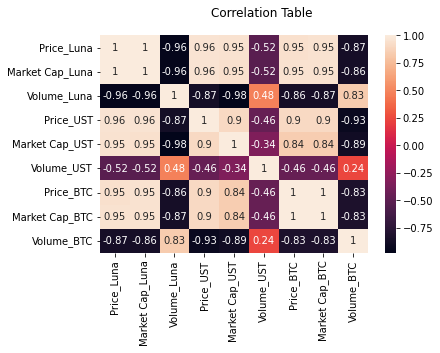

In [126]:
import seaborn as sns
sns.heatmap(all_data_cor, xticklabels=all_data_cor.columns, yticklabels=all_data_cor.columns, annot=True)
plt.suptitle('Correlation Table')

## From this analysis we can conclude that attack on ust and luna causes the drop on market overall.